<a href="https://colab.research.google.com/github/randywreed/cat_classifier/blob/main/fastai_multicat_classification_df.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi


Mon Nov  9 19:36:08 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8    10W /  70W |     10MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
#!pip install fastcore==1.2.5

     |████████████████████████████████| 727kB 4.7MB/s 
     |████████████████████████████████| 51kB 8.0MB/s 
     |████████████████████████████████| 194kB 22.5MB/s 
     |████████████████████████████████| 51kB 8.5MB/s 
     |████████████████████████████████| 1.1MB 22.9MB/s 
     |████████████████████████████████| 92kB 11.1MB/s 
     |████████████████████████████████| 40kB 7.4MB/s 
     |████████████████████████████████| 51kB 8.8MB/s 
     |████████████████████████████████| 51kB 9.2MB/s 
     |████████████████████████████████| 61kB 10.7MB/s 
     |████████████████████████████████| 2.6MB 51.4MB/s 
Mounted at /content/gdrive


In [ ]:
from fastbook import *


In [ ]:
from fastai.vision.all import *


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from pathlib import Path
path=Path('/content/drive/Shared drives/Fastai Practice/Mutl_cat/merged')

In [ ]:
# from google.colab import auth
# auth.authenticate_user()

# !echo "deb http://packages.cloud.google.com/apt gcsfuse-bionic main" > /etc/apt/sources.list.d/gcsfuse.list
# !curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | apt-key add -
# !apt -qq update
# !apt -qq install gcsfuse

# bucket_name = 'mult_label_cat_bucket-rwr'
# !mkdir my_bucket
# !gcsfuse $bucket_name /content/my_bucket

In [ ]:
from google.colab import auth
auth.authenticate_user()
project_id = 'fastai-197203'
!gcloud config set project {project_id}
!gsutil ls

Updated property [core/project].
gs://mult_label_cat_bucket-rwr/


In [ ]:
bucket_name = 'mult_label_cat_bucket-rwr'
!gsutil -m cp -r gs://{bucket_name}/training_set/training_set.zip .



Copying gs://mult_label_cat_bucket-rwr/training_set/training_set.zip...
/ [1/1 files][207.1 MiB/207.1 MiB] 100% Done                                    
Operation completed over 1 objects/207.1 MiB.                                    


In [ ]:
!unzip /content/training_set.zip

Archive:  /content/training_set.zip
  inflating: content/training_set/00000IMG_00000_BURST20200112223358555_COVER.jpg  
  inflating: content/training_set/00000IMG_00000_BURST20200112223404282_COVER.jpg  
  inflating: content/training_set/00000IMG_00000_BURST20200112223407071_COVER.jpg  
  inflating: content/training_set/00000IMG_00000_BURST20200202210616891_COVER.jpg  
  inflating: content/training_set/00000IMG_00000_BURST20200513143954170_COVER.jpg  
  inflating: content/training_set/00000IMG_00000_BURST20200513144003755_COVER.jpg  
  inflating: content/training_set/00000IMG_00000_BURST20200606212335401_COVER.jpg  
  inflating: content/training_set/00100lrPORTRAIT_00100_BURST20200110095116619_COVER.jpg  
  inflating: content/training_set/00100lrPORTRAIT_00100_BURST20200110095220123_COVER.jpg  
  inflating: content/training_set/00100lrPORTRAIT_00100_BURST20200110095224310_COVER.jpg  
  inflating: content/training_set/00100lrPORTRAIT_00100_BURST20200110095224985_COVER.jpg  
  inflating:

In [ ]:
import pandas as pd
df=pd.read_pickle(path/'all_cats_images_v6_gcs.pkl')

In [ ]:
df.head()


,image,label
0,Copy of 00100lrPORTRAIT_00100_BURST20200607203520817_COVER.jpg,asha
1,Copy of 00100lrPORTRAIT_00100_BURST20200112211253840_COVER.jpg,asha
2,Copy of 00100lrPORTRAIT_00100_BURST20200607203523499_COVER.jpg,asha
3,Copy of 00100lrPORTRAIT_00100_BURST20200110115656194_COVER.jpg,asha
4,Copy of 00100lrPORTRAIT_00100_BURST20200110115656885_COVER.jpg,asha


In [ ]:
def fix_path(opath):
  import pathlib
  path=Path(opath).name
  #index=path.parts.index('Shared drives')
  #npath=pathlib.Path('/content/gdrive').joinpath(*path.parts[index:])
  new_path=Path('/content/content/training_set')
  npath=new_path.joinpath(path)
  return npath

In [ ]:
df.image=df.image.apply(fix_path)

In [ ]:
df.head()

,image,label
0,/content/content/training_set/Copy of 00100lrPORTRAIT_00100_BURST20200607203520817_COVER.jpg,asha
1,/content/content/training_set/Copy of 00100lrPORTRAIT_00100_BURST20200112211253840_COVER.jpg,asha
2,/content/content/training_set/Copy of 00100lrPORTRAIT_00100_BURST20200607203523499_COVER.jpg,asha
3,/content/content/training_set/Copy of 00100lrPORTRAIT_00100_BURST20200110115656194_COVER.jpg,asha
4,/content/content/training_set/Copy of 00100lrPORTRAIT_00100_BURST20200110115656885_COVER.jpg,asha


In [ ]:
for idx,f in df.iterrows():
  try:
    open(f['image'], "rb")
  except FileNotFoundError:
    print("can't find {}".format(f['image']))

In [ ]:
#df.to_pickle(path/'all_cats_images_v6_gcs.pkl')
#/content/content/training_set/00000IMG_00000_BURST20200112223358555_COVER.jpg

In [ ]:
df['label'].unique()

array(['asha', 'chidi', 'vahti', 'asha,chidi', 'asha,vahti', 'vahti,chidi,asha', 'chidi,asha'], dtype=object)

In [ ]:
def get_x(r): return r['image']
def get_y(r): return r['label'].split(',')

In [ ]:
#failed

In [ ]:
def parent_label_multi(o):
    return [Path(o).parent.name]

In [ ]:
def get_dls(bs, size, df):
    dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   get_x=get_x,
                   get_y=get_y,
                   item_tfms=RandomResizedCrop(640,min_scale=0.5),
                   batch_tfms=[*aug_transforms(size=size, min_scale=0.75),
                               Normalize.from_stats(*imagenet_stats)])
    return dblock.dataloaders(df, bs=bs)

## cat block from path (if using dataframe skip)

In [ ]:
cats=DataBlock(
    blocks=(ImageBlock,MultiCategoryBlock),
    get_x=get_x, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=get_y,
    item_tfms=RandomResizedCrop(224,min_scale=0.5),
    batch_tfms=aug_transforms(mult=2))

In [ ]:
dls=cats.dataloaders(df)

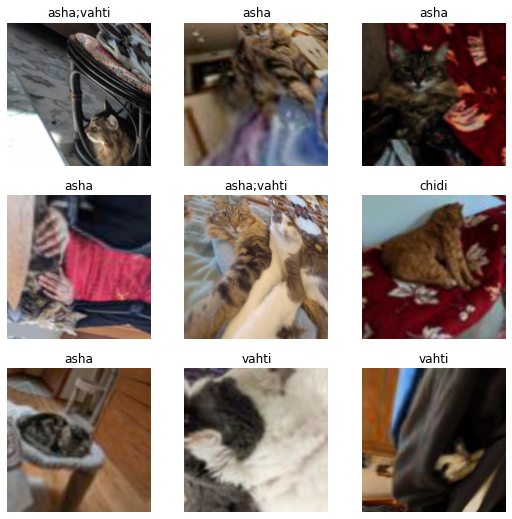

In [ ]:
dls.show_batch()

In [ ]:

path

Path('/content/drive/Shared drives/Fastai Practice/Mutl_cat/merged')

In [ ]:
dsets=cats.datasets(df)

In [ ]:
len(dsets.train),len(dsets.valid)

(509, 127)

In [ ]:
dsets.train[0]

(PILImage mode=RGB size=127x96, TensorMultiCategory([1., 0., 0.]))

In [ ]:
x,y=dsets.train[0]
x,y

(PILImage mode=RGB size=127x96, TensorMultiCategory([1., 0., 0.]))

In [ ]:
dsets.train[0][1]

TensorMultiCategory([1., 0., 0.])

In [ ]:
dsets.train.vocab

['asha', 'chidi', 'vahti']

In [ ]:
idxs = torch.where(dsets.train[0][1]==1.)[0]
dsets.train.vocab[idxs]

(#1) ['asha']

In [ ]:
#learn = cnn_learner(dls, resnet18)


In [ ]:
#x,y = to_cpu(dls.train.one_batch())
#activs = learn.model(x)
#activs.shape


In [ ]:
#activs[0]

## dataloader from dataframe

In [ ]:
dls = get_dls(128, 128, df)


In [ ]:
#learn = Learner(dls, xresnet50(), loss_func=CrossEntropyLossFlat(), 
#                metrics=accuracy)
#learn.fit_one_cycle(4, 3e-3)

In [ ]:
learn = cnn_learner(dls, resnet50, pretrained=True, metrics=[partial(accuracy_multi, thresh=0.70)], loss_func=BCEWithLogitsLossFlat(thresh=0.5),cbs=MixUp).to_fp16()


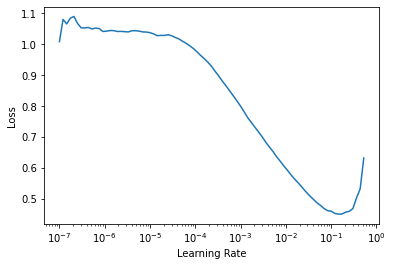

In [ ]:
lr_main, lr_steep=learn.lr_find()

In [ ]:
lr_main, lr_steep

(0.014454397559165954, 0.0012022644514217973)

In [ ]:
print("{:.8f}".format(float((lr_main+lr_steep)/2)))
from decimal import Decimal

'%.2E' % Decimal(str((lr_main+lr_steep)/2))

0.00782833


'7.83E-03'

In [ ]:
learn.fit_one_cycle(4,7e-03)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.989328,0.948924,0.576923,00:20
1,1.049597,3.768835,0.692308,00:20
2,0.903952,0.758968,0.841026,00:20
3,0.794525,0.428568,0.882051,00:20


In [ ]:
learn.dls = get_dls(64, 256, df)
learn.fine_tune(5, 1e-3)


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.612784,0.186757,0.917949,00:20


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.551710,0.204934,0.928205,00:21
1,0.525059,0.179596,0.935897,00:21
2,0.495100,0.113787,0.958974,00:21
3,0.459605,0.113516,0.946154,00:20
4,0.434765,0.113388,0.956410,00:21


In [ ]:
learn.dls = get_dls(64, 384, df)
learn.fine_tune(5, 1e-3)


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.455606,0.117878,0.966667,00:22


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.453072,0.098570,0.974359,00:23
1,0.425247,0.086957,0.976923,00:23
2,0.416764,0.097687,0.971795,00:23
3,0.397804,0.089147,0.971795,00:23
4,0.386739,0.078048,0.976923,00:23


In [ ]:
learn.export(path/'save_v8_tmp.pkl')

In [ ]:
learn=load_learner(path/'save_v8_tmp.pkl')

In [ ]:
learn.dls = get_dls(32, 460, df)
learn.fine_tune(5, 1e-3)


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.414577,0.112081,0.961538,00:24


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.401699,0.119693,0.943590,00:24
1,0.388514,0.123164,0.946154,00:24
2,0.372332,0.097605,0.969231,00:24
3,0.361602,0.106030,0.969231,00:24
4,0.357499,0.091994,0.971795,00:25


In [ ]:
learn.dls = get_dls(32, 520, df)
learn.fine_tune(5, 1e-3)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.348002,0.080166,0.984615,00:25


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.345996,0.085435,0.969231,00:26
1,0.357434,0.063936,0.976923,00:27
2,0.341221,0.071192,0.982051,00:27
3,0.342001,0.050971,0.987180,00:27
4,0.330543,0.051845,0.987180,00:26


In [ ]:
learn.dls = get_dls(32, 640, df)
learn.fine_tune(5, 1e-3)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.351932,0.073528,0.969231,00:26


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.336412,0.115503,0.953846,00:30
1,0.342356,0.154294,0.941026,00:30
2,0.326495,0.133840,0.948718,00:31
3,0.313146,0.119682,0.961538,00:30
4,0.314394,0.116707,0.961538,00:31


In [ ]:
 stopit
#learn.fine_tune(3, base_lr=2e-4, freeze_epochs=4)
#learn.fine_tune(12,base_lr=3e-3, freeze_epochs=4)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.073850,0.054757,0.965879,00:19
1,0.061557,0.053587,0.971129,00:19
2,0.054959,0.062179,0.968504,00:19
3,0.051093,0.097613,0.963255,00:19


KeyboardInterrupt: ignored

In [ ]:
#learn.export()
learn.export(path /"multi_cats_inc3_v8.pkl")

In [ ]:
#learn = cnn_learner(dls, resnet50, metrics=partial(accuracy_multi, thresh=0.9))
#learn.fine_tune(3, base_lr=2e-4, freeze_epochs=4)
learn=load_learner(path/"multi_cats_inc3_v7.pkl")

In [ ]:
preds,targs = learn.get_preds()


In [ ]:
accuracy_multi(preds, targs, thresh=0.70, sigmoid=False)


tensor(0.9764)

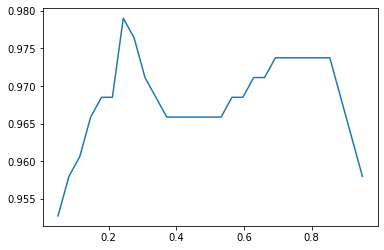

In [ ]:
xs = torch.linspace(0.05,0.95,29)
accs = [accuracy_multi(preds, targs, thresh=i, sigmoid=False) for i in xs]
plt.plot(xs,accs);

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


/usr/local/lib/python3.6/dist-packages/fastprogress/fastprogress.py:74: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


TypeError: ignored

In [ ]:
learn.dl
